Refer Ad Click Prediction Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using random forest. Analyse the performance of model with suitable evaluation measures and try to enhance the performance

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [6]:
ad=pd.read_csv('Ad Click Data.csv')
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


Daily Time Spent on Site: We see users spend between 32 min to 91 min on the site with a mean value of 65min, which is quite a large amount of time. This indicates that it is a popular site. We would like to see if there is any corellation with time spend on the site and 'clicked on Ad'.

Age: The user age ranges from 19years to 61 years with a mean of 36 years, which tells us that the target users are adults.

Area Income: The minimum users income is around 13k and the maximum user income is 79k, which tells us that the users belongs to different social classes. We would like to further investigate how the income is corelates with the click on the ad.

Daily Internet Usage: The daily internet use ranges from 104min to 269min. Out of total daily internet use, users spend quite a large amount of time on the site, which ranges from 32 to 91 min. We will check if they both are relates to each other in some way.

Male: 48% of the users are male. We will check if gender affects the rate of click on the ad.

Clicked on Ad: From the cell above and the cell below, we see that 50% of the ads were clicked and 50% of the ad weren't clicked by the user. Which tells us that our ad dataset is balanced, which will have a positive affect on training accuracy.

In [7]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [9]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [11]:
ad.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [12]:
ad.dropna(inplace = True)
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1.0,Isle of Man,2/11/2016 23:45,0
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [13]:
ad1=ad.drop(['Timestamp','Ad Topic Line','City','Country'],axis=1)

In [14]:
ad1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,0
1,80.23,31,68441.85,193.77,1.0,0
2,69.47,26,59785.94,236.50,0.0,0
3,74.15,29,54806.18,245.89,1.0,0
4,68.37,35,73889.99,225.58,0.0,0
...,...,...,...,...,...,...
993,64.20,27,66200.96,227.63,1.0,0
995,72.97,30,71384.57,208.58,1.0,1
996,51.30,45,67782.17,134.42,1.0,1
998,55.55,19,41920.79,187.95,0.0,0


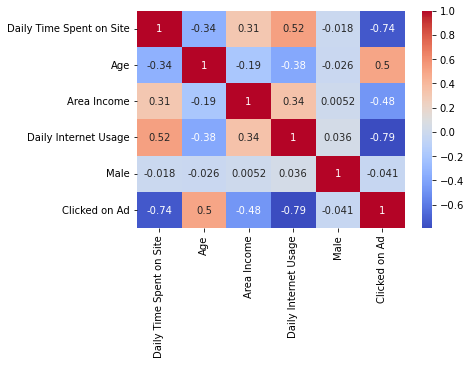

In [15]:
corr = ad1.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

here we see clicked on Ad is more correlated to age.

In [17]:
X = ad1.drop(['Clicked on Ad'], axis = 1)
Y = ad1['Clicked on Ad'] 

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [19]:
rfc = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 5, n_estimators = 100, oob_score=True) 
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [20]:
Y_pred = rfc.predict(X_test)

In [28]:
print(classification_report(Y_test, Y_pred))
print('\n confusion matix:\n',confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       148
           1       0.94      0.98      0.96       138

    accuracy                           0.96       286
   macro avg       0.96      0.96      0.96       286
weighted avg       0.96      0.96      0.96       286


 confusion matix:
 [[139   9]
 [  3 135]]


In [21]:
print(accuracy_score(Y_test, Y_pred) * 100)

95.8041958041958


so from above accuaracy our model give good result with accuracy 96%

## decision Tree


In [29]:
from sklearn.tree import plot_tree

In [31]:
tree=rfc.estimators_[0]

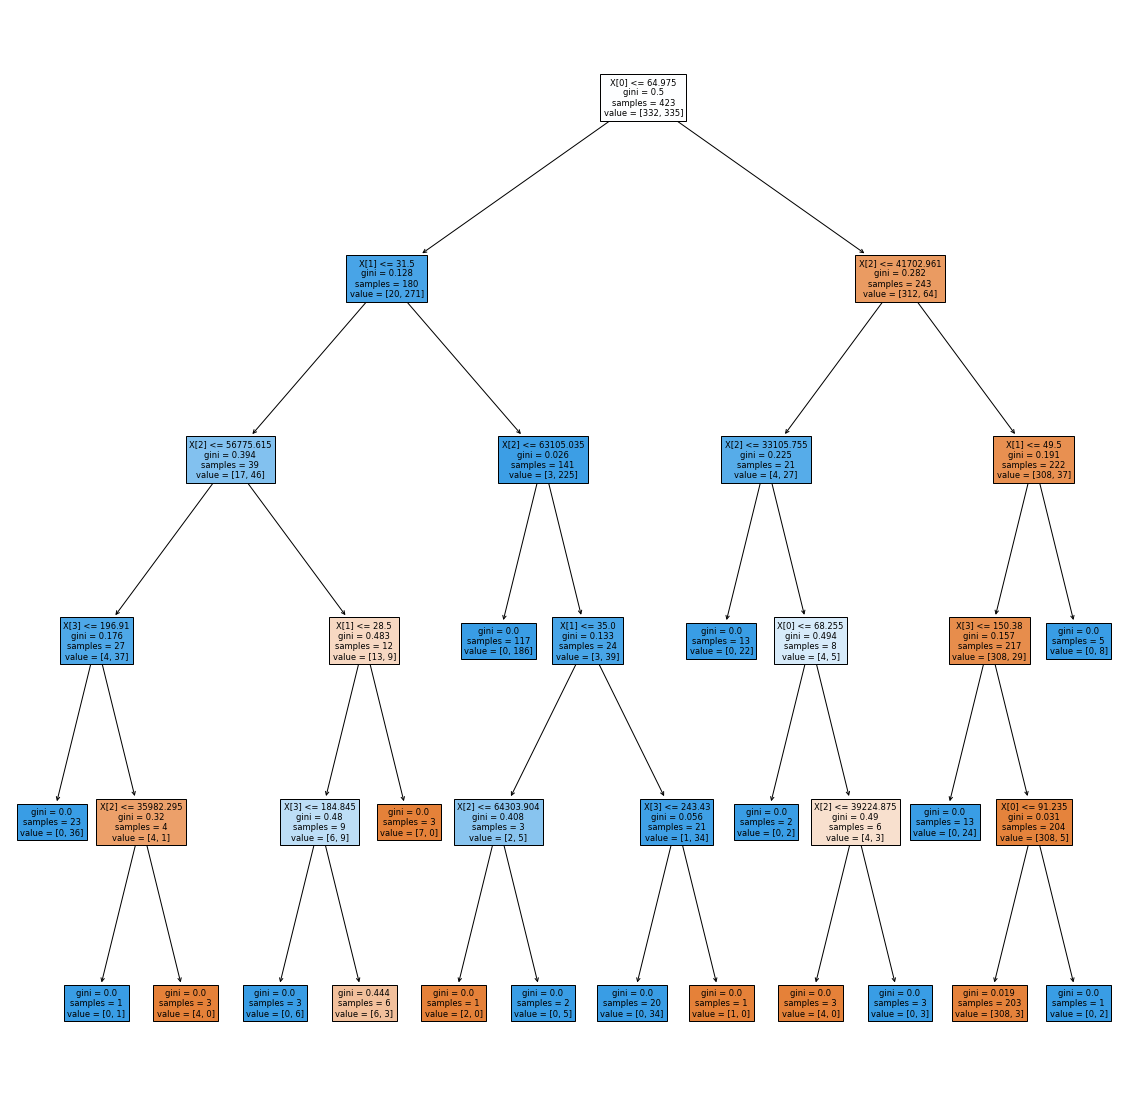

In [36]:
plt.figure(figsize=(20,20))
plot_tree(tree, filled= True)
plt.show()